# APPUNTI

- spacy_loader.py, riga 58, errore nel link (spaziare il punto dopo models)

**ok**

- quando non trova un modello spacy non è chiarissimo quale usare; ok, uno che usa emolfb da 0 probabilmente sa già di cosa ha bisogno, ma si possono aggiungere delle indicazioni per l’utente nabbo? tipo: in quali casi usare privilegiare accuracy e in quali efficiency?

**accuracy? efficiency? di che stai parlando? comunque ti dice il modello di default qual è, ma puoi sempre usarne un altro. Ok nella DOC.**

- unrelated: da spacy i modelli it_core_news_lg ed il medium non sono scaricabili

**mi piace che gli utenti soffrano (non è colpa mia)**

#### FORMAMENTIS

- draw_formamentis(): quale layout usa? cosa mi simboleggiano eventuali blocchi contrapposti?

**spring_layout. I cluster sono gruppi di parole, distanziati per force layout. Meglio che siano distanziati, così si vedono appunto gruppi di parole che interagiscono e altre che non interagiscono**

- quando si plotta l'intera rete (cioè senza specificare target word) sarebbe il caso di permettere di plottare solo parte della formamentis (es. link più pesanti, parole più significative, altri criteri che possiamo stabilire...)? Perché sulle reti grandi viene fuori un casino

**questo è il classico esempio di cosa che ti sbatti un sacco per farla, ma poi gli utenti non la usano. C'è chi vuole le parole più ripetute, c'è chi vuole la GCC, c'è chi vuole solo le parole che cominciano per 'A'... filtrare la formamentis PRIMA di plottarla è facile, lascia agli utenti la libertà di fare quello che gli pare**

- emo.formamentis_network(): hanno senso i parametri language e model quando ho già inizializzato il modello come, per esempio, emo=EmoScores(language = 'italian', spacy_model='it_core_news_sm’)? Per capirci, se faccio una cosa tipo

In [ ]:
emos_ita=EmoScores(language = 'italian', spacy_model='it_core_news_sm’)
emos_ita.formamentis_network(ita_text, target_word='lavoro', language='french', spacy_model=None)

mi da comunque un risultato: che sta facendo?


**Sta cercando le emozioni in francese, con il modello italiano... l'idea era lasciare la flessibilità totale, ma forse in effetti non ha senso... cambio**

- le forma mentis contengono selfloop: ok?

**Boh? Tolgo, verifico**

- le formamentis sono pesate (direi di no)? sono dirette?

**C'è un parametro per quello: non arrivano pesate, ma con doppioni sì. Pesiamola**

- una formamentis con target word costruisce un ego network della parola? in tal caso, avrebbe senso rimuoverla per non visualizzare le connessioni a stella? se si lascia, si falsano tutte le metriche di rete

**TODO: original_node = [V/F]**

#### ALTRO

- funzione per vedere quali parole sono driver di emozioni: ne avevamo parlato prima di partire per lione e la stavi già implementando

**Done.**

- zscore - rescale parameter: non è intuitivo come settare gli estremi per il rescaling. Forse è meglio specificare un fattore di normalizzazione?

**Intendi nel plot? Concordo che non sia intuitivo, ma dici che è solo il nome? Normalize sarebbe meglio?**


- è il caso di prevedere la possibilità di passare come testo una lista di stringhe? Se ho più testi che voglio analizzare insieme ci vuole poco a concatenarli, ma magari vogliamo far trovare la pappa pronta

**Sempre lo stesso principio**

In [2]:
import re
from emotionslib import EmoScores
import matplotlib.pyplot as plt
import time
import numpy as np
import json

# Costituzione

### Data loading and pre-processing

In [2]:
#italian
ita_text = open('sample_texts/costituzione.txt').read()
lowercase = ita_text.lower()
cleaned = re.sub("[*#!:;.,()/']", ' ', lowercase) # Deletes "strange" characters
sub = cleaned.replace('cost ', 'costituzionale ') # Replaces "cost" with "costituzionale"
ita_text=re.sub('art + [1-9][0-9]{0,2}','',sub)

#canadian
can_text = open('sample_texts/canadian_const.rst').read()

#french
old_fr_text=open('sample_texts/french_rev.txt').read()
new_fr_text=open('sample_texts/french_current.txt').read()

### Initialize the model

In [5]:
emos_eng = EmoScores(language = 'english', spacy_model=None)
emos_ita = EmoScores(language = 'italian', spacy_model='it_core_news_sm')
emos_fr  = EmoScores(language = 'french', spacy_model='fr_core_news_md')

In [4]:
emo_counts_can = emos_eng.emotions(can_text, normalization_strategy = 'num_emotions')
emo_counts_ita = emos_ita.emotions(ita_text, normalization_strategy = 'num_emotions')
emo_counts_fr_old = emos_fr.emotions(old_fr_text, normalization_strategy = 'num_emotions')
emo_counts_fr_new = emos_fr.emotions(new_fr_text, normalization_strategy = 'num_emotions')


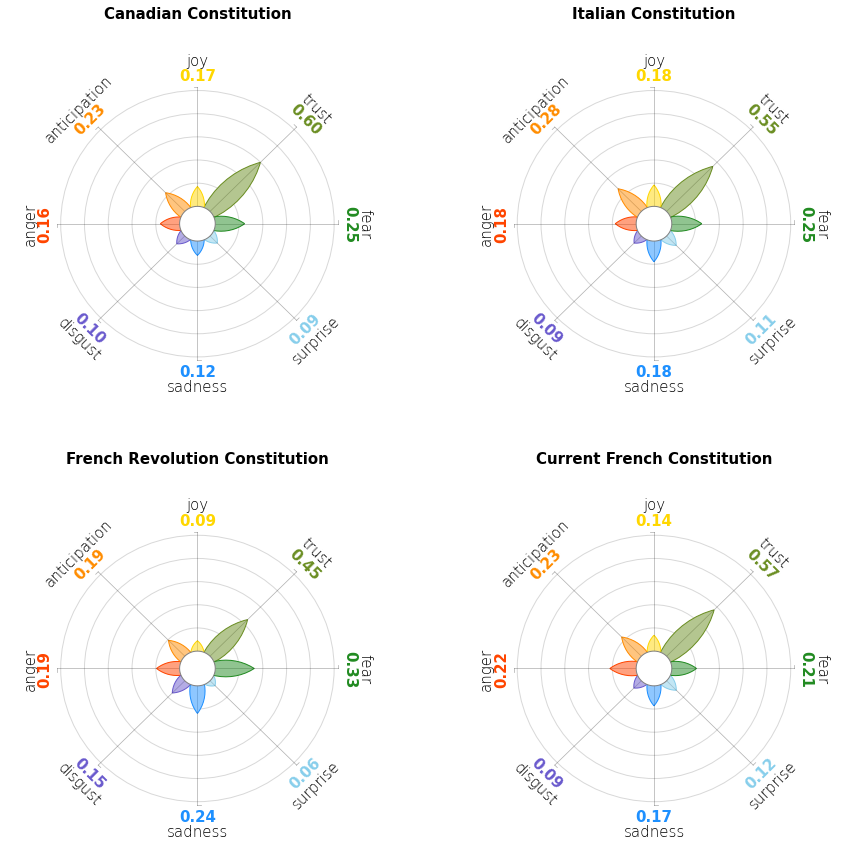

In [5]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))

emos_eng.draw_plutchik(emo_counts_can, ax = ax[0][0], title = 'Canadian Constitution')
emos_ita.draw_plutchik(emo_counts_ita, ax = ax[0][1], title = 'Italian Constitution')
emos_fr.draw_plutchik(emo_counts_fr_old, ax = ax[1][0], title = 'French Revolution Constitution')
emos_fr.draw_plutchik(emo_counts_fr_new, ax = ax[1][1], title = 'Current French Constitution')

plt.show()

CPU times: user 1.93 s, sys: 0 ns, total: 1.93 s
Wall time: 1.94 s


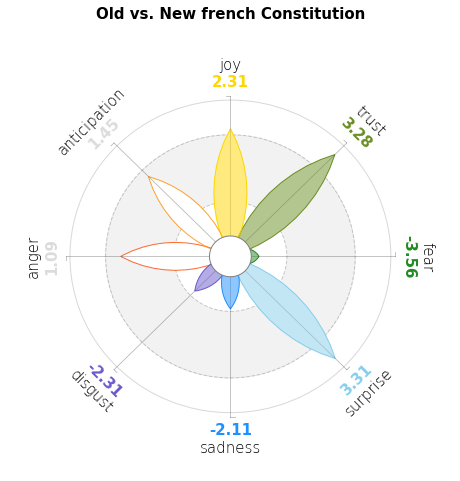

In [10]:
%%time 

zscores = emos_fr.zscores(new_fr_text, baseline = old_fr_text, duplicates = False)
emos_fr.draw_plutchik(zscores,  rescale=(-4, 4), reject_range = (-1.96, 1.96),  title='Old vs. New french Constitution')

Dal plot superiore non mi è chiarissimo che fattore usare per riscalare. 

In [11]:
%%time

edges,vertex = emos_fr.formamentis_network(new_fr_text,with_type=False)
emos_fr.draw_formamentis(edges)

KeyboardInterrupt: 

Non si capisce una sega

CPU times: user 10.1 s, sys: 36 ms, total: 10.1 s
Wall time: 10.1 s


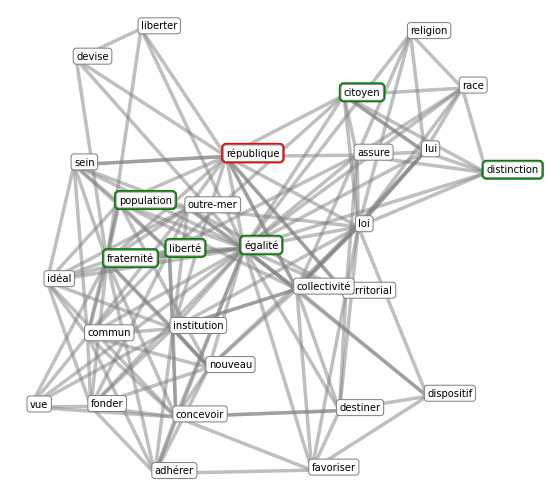

In [12]:
%%time

edges,vertex = emos_fr.formamentis_network(new_fr_text, target_word='égalité')
emos_fr.draw_formamentis(edges)

Republique con valenza negativa?

CPU times: user 7.02 s, sys: 105 ms, total: 7.13 s
Wall time: 7.1 s


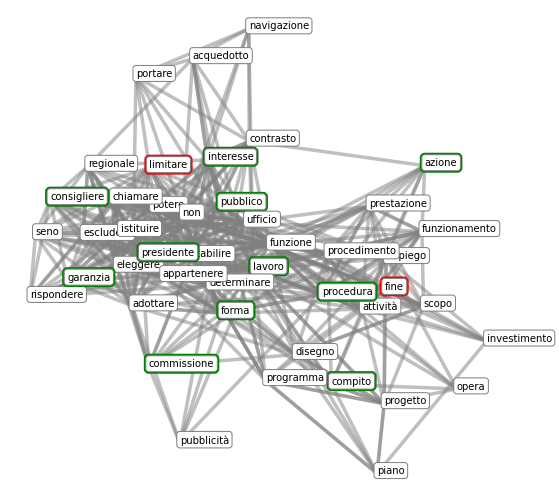

In [13]:
%%time

edges,vertex = emos_ita.formamentis_network(ita_text, target_word='lavoro')
emos_ita.draw_formamentis(edges)

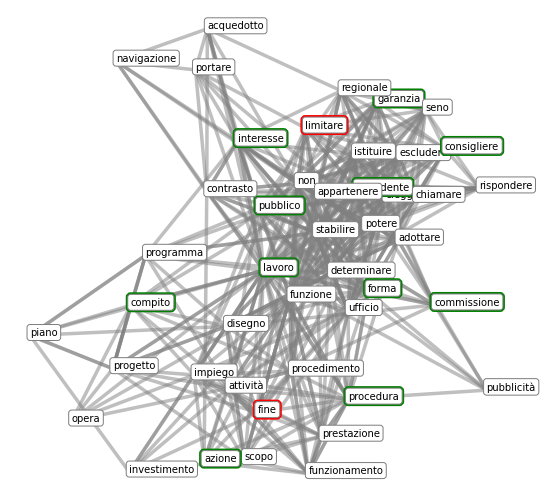

In [15]:
edges,vertex = emos_ita.formamentis_network(ita_text, target_word='lavoro')
emos_ita.draw_formamentis(edges)

Qui gli ho passato un modello inizializzato in italiano e gli ho detto di creare la forma mentis in francese con modello inglese. Ha senso che venga comunque fuori un risultato?

# Bob (Dylan & Marley)

In [7]:
with open('sample_texts/bob_dylan.json','r') as f:
    bob={}
    for line in f.readlines():
        a=json.loads(line)
        bob[a['name'].lower()]=a['text']
        


In [17]:
%%time


emos_eng = EmoScores(language = 'english', spacy_model=None)

song=bob["blowin' in the wind"]
print(len(song))

emo_counts_blowin=emos_eng.emotions(song, normalization_strategy = 'num_emotions')

929
CPU times: user 1.35 s, sys: 5.47 s, total: 6.82 s
Wall time: 9.06 s


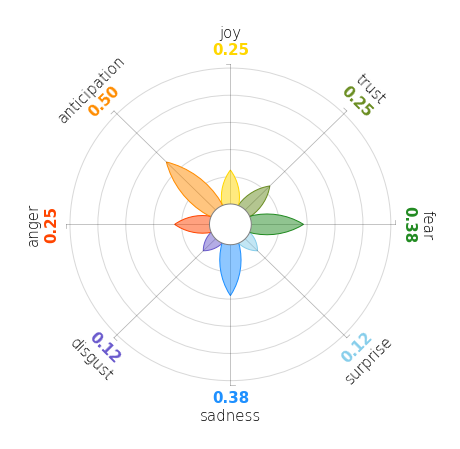

In [18]:
emos_eng.draw_plutchik(emo_counts_blowin)

In [6]:
%%time
discography=''

for song in bob.values():
    discography+=song
    
#emos.emotions() prende un'unica stringa oppure edgelist. Passare una lista di stringhe e concatenare?

emo_counts_discography=emos_eng.emotions(discography, normalization_strategy = 'num_emotions')


NameError: name 'bob' is not defined

CPU times: user 9min 26s, sys: 34.2 s, total: 10min 1s
Wall time: 9min 46s


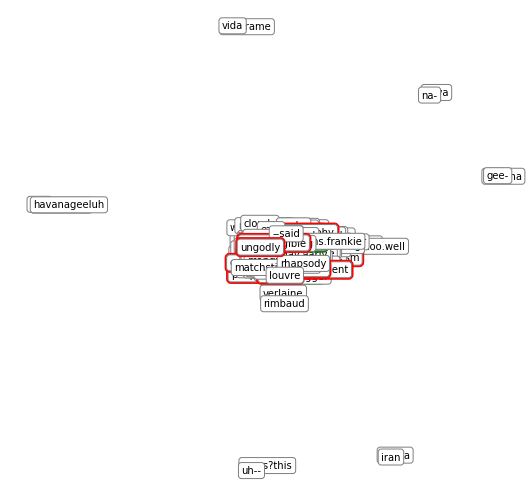

In [27]:
%%time

edges, vertex = emos_eng.formamentis_network(discography)
emos_eng.draw_formamentis(edges)

A giudicare dal risultato, la pulizia del testo ha lasciato passare diverse parole strane (-said, uh--, gee-, na-, qualcosa?this, ecc.). Forse è consigliabile passare del testo in qualche modo già pre-processato. 

Inoltre richiede molto tempo creare e visualizzare una rete di queste dimensioni.

In [20]:
print(len(edges))
print(len(discography))

101748
569141


In [30]:
discography=discography.split()
len(set(discography))

13515

In [23]:
edges

[('air', 'try'),
 ('hand', 'compass'),
 ('stop', 'gimmick'),
 ('animal', 'go'),
 ('stick', 'crush'),
 ('open', 'bring'),
 ('shoot', 'shot'),
 ('perfume', 'mound'),
 ('foggy', 'ruin'),
 ('bury', 'sing'),
 ('leave', 'man'),
 ('fool', 'bogge'),
 ('catch', 'roam'),
 ('-PRON-', 'support'),
 ('say', 'goodbye'),
 ('stubborn', 'slide'),
 ('talker', 'gun'),
 ('vote', 'man'),
 ('heavyweight', 'world'),
 ('blow', 'bang'),
 ('hand', 'numb'),
 ('arrest', 'guard'),
 ('plug', 'poke'),
 ('love', 'life'),
 ('echo', 'hard'),
 ('grieve', 'sadness'),
 ('test', 'taste'),
 ('blue', 'fill'),
 ('train', 'blue'),
 ('carry', 'reveal'),
 ('dream', 'deathless'),
 ('lose', 'breath'),
 ('pin', 'flag'),
 ('stool', 'diddley'),
 ('crawl', 'way'),
 ('make', 'sweat'),
 ('neighbor', 'reveal'),
 ('range', 'place'),
 ('search', 'try'),
 ('sad', 'tear'),
 ('man', 'love'),
 ('spring', 'summer'),
 ('time', 'wondering'),
 ('study', 'grace'),
 ('love', 'cold'),
 ('thumb', 'speak'),
 ('take', 'hair'),
 ('like', 'tell'),
 ('book'

### Bob Marley

In [8]:
is_this_love="I wanna love you And treat you right I wanna love you Every day and every night I wanna love you And treat you right I wanna love you Every day and every night We'll be together With a roof right over our heads We'll share the shelter Of my single bed We'll share the same room Is this love Is this love Is this love Is this love that I'm feeling? I wanna love you And treat you right I wanna love you Every day and every night We'll be together With a roof right over our heads We'll share the shelter Of my single bed We'll share the same room Is this love Is this love Is this love Is this love that I'm feeling? Is this love Is this love Is this love Is this love that I'm feeling? I wanna know, wanna know, wanna know now! Is this love Is this love Is this love Is this love that I'm feeling? Is this love Is this love Is this love Is this love that I'm feeling? I wanna love ya"

883
CPU times: user 123 ms, sys: 0 ns, total: 123 ms
Wall time: 127 ms


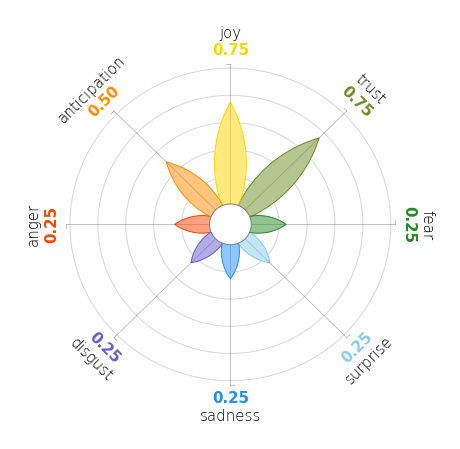

In [11]:
%%time

print(len(is_this_love))

emo_counts_marley=emos_eng.emotions(is_this_love, normalization_strategy = 'num_emotions')

emos_eng.draw_plutchik(emo_counts_marley)

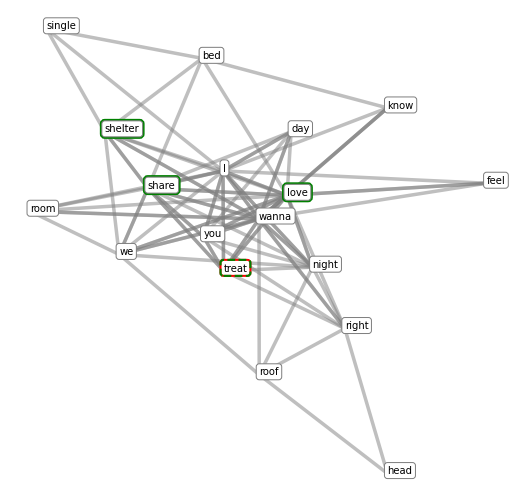

In [12]:
edges, vertex = emos_eng.formamentis_network(is_this_love)
emos_eng.draw_formamentis(edges)

CPU times: user 716 ms, sys: 42.5 ms, total: 758 ms
Wall time: 790 ms


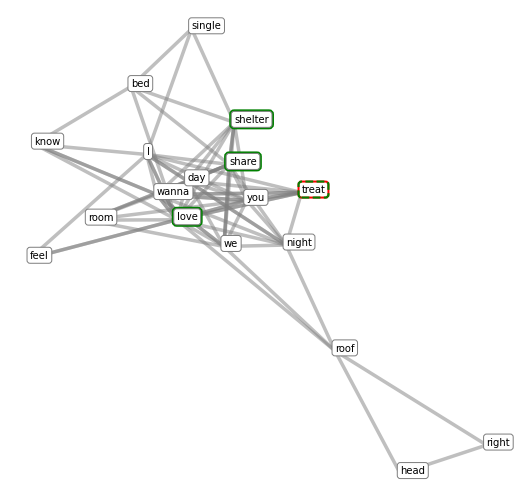

In [13]:
%%time

#small spacy module
emos_eng_sm=EmoScores(language='english', spacy_model='en_core_web_sm')

edges_sm, vertex_sm = emos_eng_sm.formamentis_network(is_this_love)
emos_eng_sm.draw_formamentis(edges_sm)

CPU times: user 1.47 s, sys: 16.4 s, total: 17.9 s
Wall time: 18.7 s


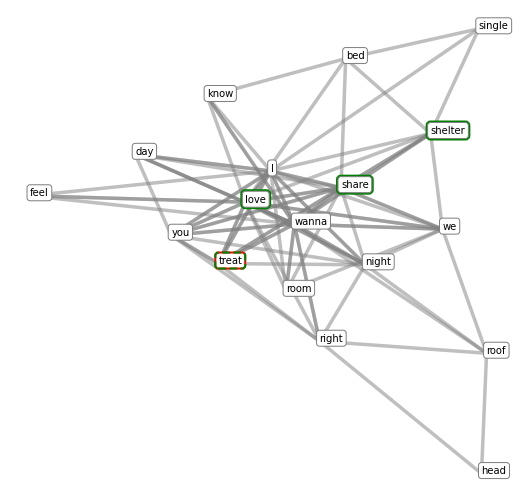

In [14]:
%%time

#large model
emos_eng_lg=EmoScores(language='english', spacy_model='en_core_web_lg')

edges_lg, vertex_lg = emos_eng_lg.formamentis_network(is_this_love)
emos_eng_lg.draw_formamentis(edges_lg)

In [53]:
#very little difference between small and large spacy models

print(len(edges_sm), len(edges_lg))

unique_edges_lg=set(tuple(sorted(x)) for x in edges_lg)
unique_edges_sm=set(tuple(sorted(x)) for x in edges_sm)

print('Non-directed: {},{} <-- small model edgelist is longer than large model edgelist!\n'.format(len(unique_edges_lg),len(unique_edges_sm)))

print('Edges in large and not in small: {}\n'.format(unique_edges_lg-unique_edges_sm))
print('Edges in small and not in large: {}\n'.format(unique_edges_sm-unique_edges_lg))

58 58
Non-directed: 46,53 <-- small model edgelist is longer than large model edgelist!

Edges in large and not in small: {('roof', 'wanna'), ('day', 'roof'), ('i', 'i')}

Edges in small and not in large: {('love', 'right'), ('right', 'treat'), ('i', 'night'), ('-PRON-', 'right'), ('right', 'wanna'), ('night', 'share'), ('roof', 'share'), ('i', 'right'), ('night', 'shelter'), ('night', 'roof')}



Anzi, sembra addirittura che la forma mentis del modello small contenga più tuple di quella large.

## Altro tipo di testo (discorso)

In [15]:
silvio="L'Italia è il Paese che amo. Qui ho le mie radici, le mie speranze, i miei orizzonti. Qui ho imparato, da mio padre e dalla vita, il mio mestiere di imprenditore. Qui ho appreso la passione per la libertà. Ho scelto di scendere in campo e di occuparmi della cosa pubblica perché non voglio vivere in un Paese illiberale, governato da forze immature e da uomini legati a doppio filo a un passato politicamente ed economicamente fallimentare. Per poter compiere questa nuova scelta di vita, ho rassegnato oggi stesso le mie dimissioni da ogni carica sociale nel gruppo che ho fondato. Rinuncio dunque al mio ruolo di editore e di imprenditore per mettere la mia esperienza e tutto il mio impegno a disposizione di una battaglia in cui credo con assoluta convinzione e con la più grande fermezza. So quel che non voglio e, insieme con i molti italiani che mi hanno dato la loro fiducia in tutti questi anni, so anche quel che voglio. E ho anche la ragionevole speranza di riuscire a realizzarlo, in sincera e leale alleanza con tutte le forze liberali e democratiche che sentono il dovere civile di offrire al Paese una alternativa credibile al governo delle sinistre e dei comunisti. La vecchia classe politica italiana è stata travolta dai fatti e superata dai tempi. L'autoaffondamento dei vecchi governanti, schiacciati dal peso del debito pubblico e dal sistema di finanziamento illegale dei partiti, lascia il Paese impreparato e incerto nel momento difficile del rinnovamento e del passaggio a una nuova Repubblica. Mai come in questo momento l'Italia, che giustamente diffida di profeti e salvatori, ha bisogno di persone con la testa sulle spalle e di esperienza consolidata, creative ed innovative, capaci di darle una mano, di far funzionare lo Stato. Il movimento referendario ha condotto alla scelta popolare di un nuovo sistema di elezione del Parlamento. Ma affinché il nuovo sistema funzioni, è indispensabile che al cartello delle sinistre si opponga, un polo delle libertà che sia capace di attrarre a sé il meglio di un Paese pulito, ragionevole, moderno. Di questo polo delle libertà dovranno far parte tutte le forze che si richiamano ai principi fondamentali delle democrazie occidentali, a partire da quel mondo cattolico che ha generosamente contribuito all'ultimo cinquantennio della nostra storia unitaria. L'importante è saper proporre anche ai cittadini italiani gli stessi obiettivi e gli stessi valori che hanno fin qui consentito lo sviluppo delle libertà in tutte le grandi democrazie occidentali. Quegli obiettivi e quei valori che invece non hanno mai trovato piena cittadinanza in nessuno dei Paesi governati dai vecchi apparati comunisti, per quanto riverniciati e riciclati. Né si vede come a questa regola elementare potrebbe fare eccezione proprio l'Italia. Gli orfani i e i nostalgici del comunismo, infatti, non sono soltanto impreparati al governo del Paese. Portano con sé anche un retaggio ideologico che stride e fa a pugni con le esigenze di una amministrazione pubblica che voglia essere liberale in politica e liberista in economia. Le nostre sinistre pretendono di essere cambiate. Dicono di essere diventate liberaldemocratiche. Ma non è vero. I loro uomini sono sempre gli stessi, la loro mentalità, la loro cultura, i loro più profondi convincimenti, i loro comportamenti sono rimasti gli stessi. Non credono nel mercato, non credono nell'iniziativa privata, non credono nel profitto, non credono nell'individuo. Non credono che il mondo possa migliorare attraverso l'apporto libero di tante persone tutte diverse l'una dall'altra. Non sono cambiati. Ascoltateli parlare, guardate i loro telegiornali pagati dallo Stato, leggete la loro stampa. Non credono più in niente. Vorrebbero trasformare il Paese in una piazza urlante, che grida, che inveisce, che condanna. Per questo siamo costretti a contrapporci a loro. Perché noi crediamo nell'individuo, nella famiglia, nell'impresa, nella competizione, nello sviluppo, nell'efficienza, nel mercato libero e nella solidarietà, figlia della giustizia e della libertà. Se ho deciso di scendere in campo con un nuovo movimento, e se ora chiedo di scendere in campo anche a voi, a tutti voi - ora, subito, prima che sia troppo tardi - è perché sogno, a occhi bene aperti, una società libera, di donne e di uomini, dove non ci sia la paura, dove al posto dell'invidia sociale e dell'odio di classe stiano la generosità, la dedizione, la solidarietà, l'amore per il lavoro, la tolleranza e il rispetto per la vita. I1 movimento politico che vi propongo si chiama, non a caso, Forza Italia. Ciò che vogliamo farne è una libera organizzazione di elettrici e di elettori di tipo totalmente nuovo: non l'ennesimo partito o l'ennesima fazione che nascono per dividere, ma una forza che nasce invece con l'obiettivo opposto; quello di unire, per dare finalmente all'Italia una maggioranza e un governo all'altezza delle esigenze più profondamente sentite dalla gente comune. Ciò che vogliamo offrire agli italiani è una forza politica fatta di uomini totalmente nuovi. Ciò che vogliamo offrire alla nazione è un programma di governo fatto solo di impegni concreti e comprensibili. Noi vogliamo rinnovare la società italiana, noi vogliamo dare sostegno e fiducia a chi crea occupazione e benessere, noi vogliamo accettare e vincere le grandi sfide produttive e tecnologiche dell'Europa e del mondo moderno. Noi vogliamo offrire spazio a chiunque ha voglia di fare e di costruire il proprio futuro, al Nord come al Sud vogliamo un governo e una maggioranza parlamentare che sappiano dare adeguata dignità al nucleo originario di ogni società, alla famiglia, che sappiano rispettare ogni fede e suscitino ragionevoli speranze per chi è più debole, per chi cerca lavoro, per chi ha bisogno di cure, per chi, dopo una vita operosa, ha diritto di vivere in serenità. Un governo e una maggioranza che portino più attenzione e rispetto all'ambiente, che sappiano opporsi con la massima determinazione alla criminalità, alla corruzione, alla droga. Che sappiano garantire ai cittadini più sicurezza, più ordine e più efficienza. La storia d'Italia è ad una svolta. Da imprenditore, da cittadino e ora da cittadino che scende in campo, senza nessuna timidezza ma con la determinazione e la serenità che la vita mi ha insegnato, vi dico che è possibile farla finita con una politica di chiacchiere incomprensibili, di stupide baruffe e di politica senza mestiere. Vi dico che è possibile realizzare insieme un grande sogno: quello di un'Italia più giusta, più generosa verso chi ha bisogno più prospera e serena più moderna ed efficiente protagonista in Europa e nel mondo. Vi dico che possiamo, vi dico che dobbiamo costruire insieme per noi e per i nostri figli, un nuovo miracolo italiano." 

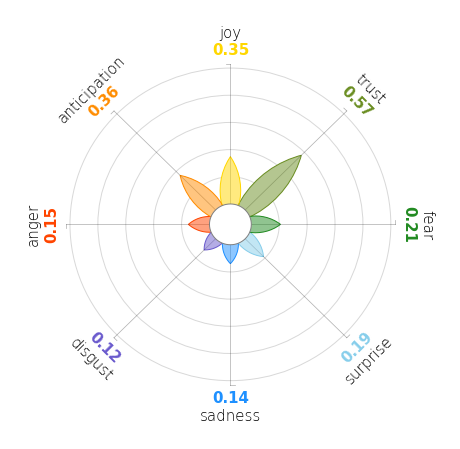

In [16]:
emo_count_silvio=emos_ita.emotions(silvio, normalization_strategy='num_emotions')
emos_ita.draw_plutchik(emo_count_silvio)

In [20]:
emos_ita.emotion_words(silvio, duplicates = True)['anger']

{'politica': 3,
 'condanna': 1,
 'incerto': 1,
 'costringere': 1,
 'paura': 1,
 'attenzione': 1,
 'sfida': 1,
 'schiacciare': 1,
 'odio': 1,
 'peso': 1}

In [24]:
%%time 

edges, vertex= emos_ita.formamentis_network(silvio, target_word='tassa')
edges

CPU times: user 599 ms, sys: 1.99 ms, total: 601 ms
Wall time: 602 ms


[]

In [26]:
'tasse' in silvio.lower()

False

__Warning__: nessun errore se si costruisce formamentis attorno a parola non contenuta nel testo

In [76]:
%%time 

edges, vertex= emos_ita.formamentis_network(silvio, target_word='italia')

CPU times: user 2.73 s, sys: 199 ms, total: 2.93 s
Wall time: 2.96 s


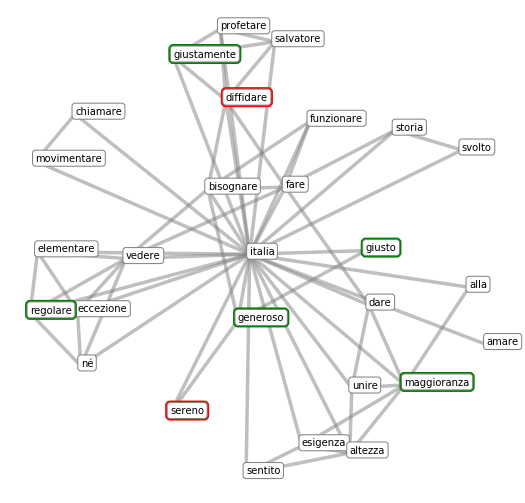

In [78]:
emos_ita.draw_formamentis(edges)